<a href="https://colab.research.google.com/github/weiyuchen1213/CE888/blob/master/p_weather_of_Decision_Making_As_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [0]:
# Import library
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [0]:
from google.colab import files

#!pip install -q kaggle

# Load data from Kaggle to Google Colab virtual machine
os.environ['KAGGLE_USERNAME'] = "weiyuchen77" # username from the json file
os.environ['KAGGLE_KEY'] = "3d26b3cb2ae2ad68701ebe9a6baadcc4" # key from the json file
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package # api copied from kaggle

  0% 0.00/3.87M [00:00<?, ?B/s]
100% 3.87M/3.87M [00:00<00:00, 125MB/s]


In [0]:
# read the datasets
p_weather = pd.read_csv("weather-dataset-rattle-package.zip")

In [0]:
p_weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Data Visualization

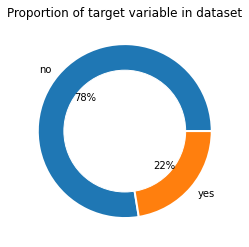

In [0]:

plt.pie(p_weather["RainTomorrow"].value_counts().values,
        labels=["no","yes"],
        autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.subplots_adjust(wspace = .2)
plt.title("Proportion of target variable in dataset")
plt.show()




In [0]:
p_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

# Check missing value

In [0]:
# dealing with missing value
p_weather_missing = p_weather.isnull().sum()
p_weather_missing


Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [0]:
# drop have over 10,000 missing value 'Sunshine','Evaporation','Cloud3pm','Cloud9am'
p_weather = p_weather.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm','RISK_MM','WindDir9am','Pressure9am','Pressure3pm'],axis=1)

In [0]:
# obkect columns fill None or missing into missing valuse


cols1 = ["WindDir3pm"]
for col in cols1:
    p_weather[col].fillna("None", inplace=True)

cols1 = ["WindGustDir"]
for col in cols1:
    p_weather[col].fillna("None", inplace=True) 

cols1 = ["WindSpeed9am"]
for col in cols1:
    p_weather[col].fillna("None", inplace=True) 
cols1 = ["RainToday"]
for col in cols1:
    p_weather[col].fillna("missing", inplace=True)          

In [0]:
# float columns fill mean into missing valuse

p_weather.loc[p_weather['MinTemp'].isnull(),'MinTemp']=p_weather['MinTemp'].mean(skipna=True)
p_weather.loc[p_weather['MaxTemp'].isnull(),'MaxTemp']=p_weather['MaxTemp'].mean(skipna=True)
p_weather.loc[p_weather['Rainfall'].isnull(),'Rainfall']=p_weather['Rainfall'].mean(skipna=True)
p_weather.loc[p_weather['WindGustSpeed'].isnull(),'WindGustSpeed']=p_weather['WindGustSpeed'].mean(skipna=True)
p_weather.loc[p_weather['WindSpeed3pm'].isnull(),'WindSpeed3pm']=p_weather['WindSpeed3pm'].mean(skipna=True)
p_weather.loc[p_weather['Humidity9am'].isnull(),'Humidity9am']=p_weather['Humidity9am'].mean(skipna=True)
p_weather.loc[p_weather['Humidity3pm'].isnull(),'Humidity3pm']=p_weather['Humidity3pm'].mean(skipna=True)
p_weather.loc[p_weather['Temp9am'].isnull(),'Temp9am']=p_weather['Temp9am'].mean(skipna=True)
p_weather.loc[p_weather['Temp3pm'].isnull(),'Temp3pm']=p_weather['Temp3pm'].mean(skipna=True)

In [0]:
p_weather_missing = p_weather.isnull().sum()
p_weather_missing

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [0]:
#Convert two class names to 0 and 1 
p_weather.RainToday = [1 if each == "Yes" else 0 for each in p_weather.RainToday]
p_weather.RainTomorrow = [1 if each == "Yes" else 0 for each in p_weather.RainTomorrow]

# Normalization

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
for col in p_weather.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    p_weather[col] = mms.fit_transform(p_weather[[col]])
p_weather.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.487887,0.529807,0.006334,0.263444,0.214225,0.688438,0.514826,0.510285,0.519909,0.221213,0.224181
std,0.150682,0.134396,0.022704,0.101848,0.100248,0.189321,0.205321,0.136544,0.131877,0.415065,0.417043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.193798,0.149425,0.570000,0.370000,0.411392,0.424184,0.000000,0.000000
50%,0.483491,0.519849,0.000000,0.255814,0.214225,0.700000,0.514826,0.506329,0.512476,0.000000,0.000000
75%,0.596698,0.623819,0.002156,0.310078,0.275862,0.830000,0.650000,0.605485,0.608445,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#  Lable encoding 

In [0]:
p_weather_X = p_weather.drop('RainTomorrow', axis = 1)
p_weather_Y = np.array(p_weather['RainTomorrow'])

from sklearn.preprocessing import LabelEncoder
for col in p_weather_X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    p_weather_X[col] = le.fit_transform(p_weather_X[col].astype('str'))
p_weather_X=p_weather_X.values


print("Pulsar:",p_weather_X)
print(p_weather_X.shape)
print(p_weather_Y.shape)


Pulsar: [[3.96000000e+02 2.00000000e+00 5.16509434e-01 ... 5.08438819e-01
  5.22072937e-01 0.00000000e+00]
 [3.97000000e+02 2.00000000e+00 3.75000000e-01 ... 5.14767932e-01
  5.70057582e-01 0.00000000e+00]
 [3.98000000e+02 2.00000000e+00 5.04716981e-01 ... 5.94936709e-01
  5.48944338e-01 0.00000000e+00]
 ...
 [3.43200000e+03 4.10000000e+01 2.85377358e-01 ... 3.81856540e-01
  5.73896353e-01 0.00000000e+00]
 [3.43300000e+03 4.10000000e+01 3.27830189e-01 ... 4.15611814e-01
  6.04606526e-01 0.00000000e+00]
 [3.43400000e+03 4.10000000e+01 3.84433962e-01 ... 4.70464135e-01
  6.02687140e-01 0.00000000e+00]]
(142193, 15)
(142193,)


# DecisionTree

In [0]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold

cv_score_DT =[]
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
i=1
for train_index,test_index in skf.split(p_weather_X, p_weather_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = p_weather_X[train_index],p_weather_X[test_index]
    ytr,yvl = p_weather_Y[train_index],p_weather_Y[test_index]
    model_DT = tree.DecisionTreeClassifier(max_depth=10, criterion = "entropy")
    model_DT.fit(xtr,ytr)
    score_DT = roc_auc_score(yvl,model_DT.predict(xvl))
    print('ROC AUC score:',score_DT)
    cv_score_DT.append(score_DT)
    print('Confusion matrix \n',confusion_matrix(yvl,model_DT.predict(xvl)))
    i+=1

1 of KFold 10
ROC AUC score: 0.6871100655740389
Confusion matrix 
 [[10686   346]
 [ 1895  1293]]
2 of KFold 10
ROC AUC score: 0.7247781178149024
Confusion matrix 
 [[9863 1169]
 [1417 1771]]
3 of KFold 10
ROC AUC score: 0.6941299088405305
Confusion matrix 
 [[10218   814]
 [ 1715  1473]]
4 of KFold 10
ROC AUC score: 0.6974762552865577
Confusion matrix 
 [[9771 1261]
 [1564 1623]]
5 of KFold 10
ROC AUC score: 0.6727506261273077
Confusion matrix 
 [[10347   685]
 [ 1888  1299]]
6 of KFold 10
ROC AUC score: 0.709159314728776
Confusion matrix 
 [[9198 1834]
 [1324 1863]]
7 of KFold 10
ROC AUC score: 0.6850929660189995
Confusion matrix 
 [[10426   605]
 [ 1833  1355]]
8 of KFold 10
ROC AUC score: 0.6892817572287157
Confusion matrix 
 [[9816 1215]
 [1630 1558]]
9 of KFold 10
ROC AUC score: 0.6752571201474299
Confusion matrix 
 [[10600   431]
 [ 1946  1242]]
10 of KFold 10
ROC AUC score: 0.7172728657813552
Confusion matrix 
 [[10437   594]
 [ 1631  1557]]


# RandomForest

In [0]:
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
cv_score_RF =[]

i=1
for train_index,test_index in skf.split(p_weather_X, p_weather_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = p_weather_X[train_index],p_weather_X[test_index]
    ytr,yvl = p_weather_Y[train_index],p_weather_Y[test_index]
    model_RF = RandomForestClassifier(n_estimators=100)
    model_RF.fit(xtr,ytr)
    score_RF = roc_auc_score(yvl,model_RF.predict(xvl))
    print('ROC AUC score:',score_RF)
    cv_score_RF.append(score_RF)
    print('Confusion matrix \n',confusion_matrix(yvl,model_RF.predict(xvl)))
    i+=1

1 of KFold 10
ROC AUC score: 0.6892581453474459
Confusion matrix 
 [[10768   264]
 [ 1905  1283]]
2 of KFold 10
ROC AUC score: 0.7236986187325021
Confusion matrix 
 [[9680 1352]
 [1371 1817]]
3 of KFold 10
ROC AUC score: 0.697922855650677
Confusion matrix 
 [[10537   495]
 [ 1783  1405]]
4 of KFold 10
ROC AUC score: 0.7228013756028899
Confusion matrix 
 [[9724 1308]
 [1389 1798]]
5 of KFold 10
ROC AUC score: 0.6833352465475112
Confusion matrix 
 [[10494   538]
 [ 1863  1324]]
6 of KFold 10
ROC AUC score: 0.728560870814697
Confusion matrix 
 [[9768 1264]
 [1365 1822]]
7 of KFold 10
ROC AUC score: 0.6896392816548595
Confusion matrix 
 [[10509   522]
 [ 1828  1360]]
8 of KFold 10
ROC AUC score: 0.7037061460305718
Confusion matrix 
 [[10328   703]
 [ 1686  1502]]
9 of KFold 10
ROC AUC score: 0.6718066810006293
Confusion matrix 
 [[10600   431]
 [ 1968  1220]]
10 of KFold 10
ROC AUC score: 0.7095637684467875
Confusion matrix 
 [[10651   380]
 [ 1742  1446]]


# Elbow Method

1 of KFold 10


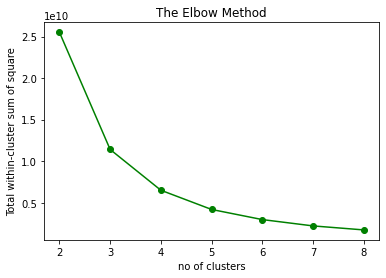

2 of KFold 10


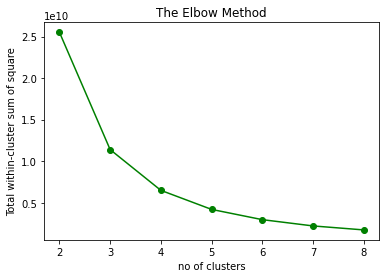

3 of KFold 10


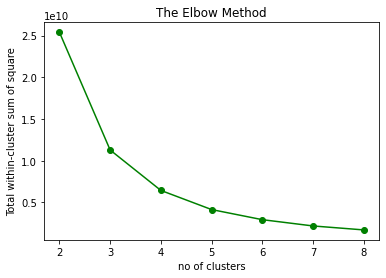

4 of KFold 10


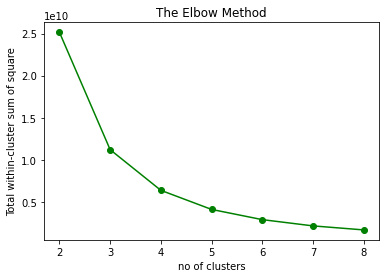

5 of KFold 10


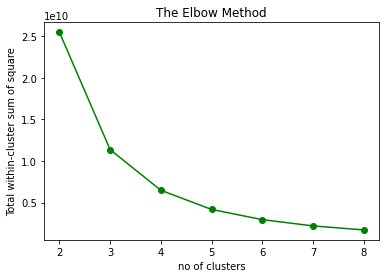

6 of KFold 10


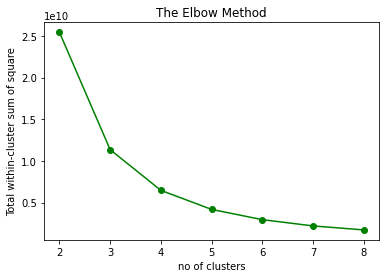

7 of KFold 10


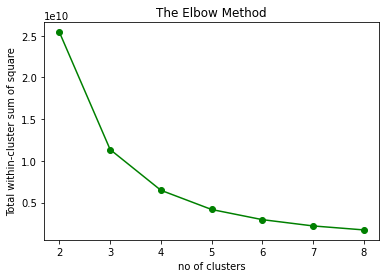

8 of KFold 10


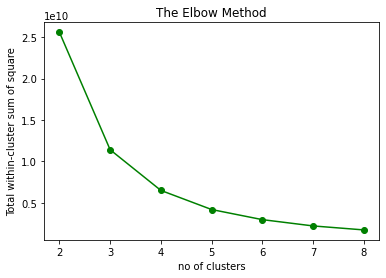

9 of KFold 10


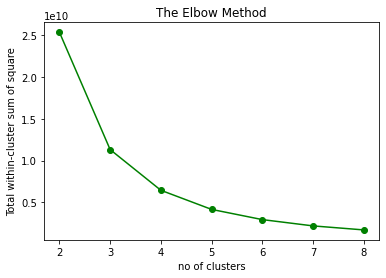

10 of KFold 10


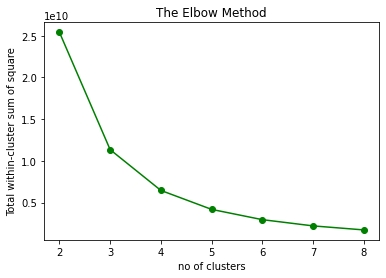

In [0]:
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)

i=1
for train_index,test_index in skf.split(p_weather_X, p_weather_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = p_weather_X[train_index],p_weather_X[test_index]
    ytr,yvl = p_weather_Y[train_index],p_weather_Y[test_index]

    score = []
    for cluster in range(2,9):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=49)
        kmeans.fit(xtr)
        score.append(kmeans.inertia_)

    plt.plot(range(2,9), score, 'g-o')
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('Total within-cluster sum of square')
    plt.show()
    i+=1

# Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.6222674642597426
For n_clusters = 3 The average silhouette_score is : 0.5859110922710276
For n_clusters = 4 The average silhouette_score is : 0.5650020788213701
For n_clusters = 5 The average silhouette_score is : 0.5513251348472079
For n_clusters = 6 The average silhouette_score is : 0.5404230363525013
For n_clusters = 7 The average silhouette_score is : 0.531518150510174
For n_clusters = 8 The average silhouette_score is : 0.5231786559700191


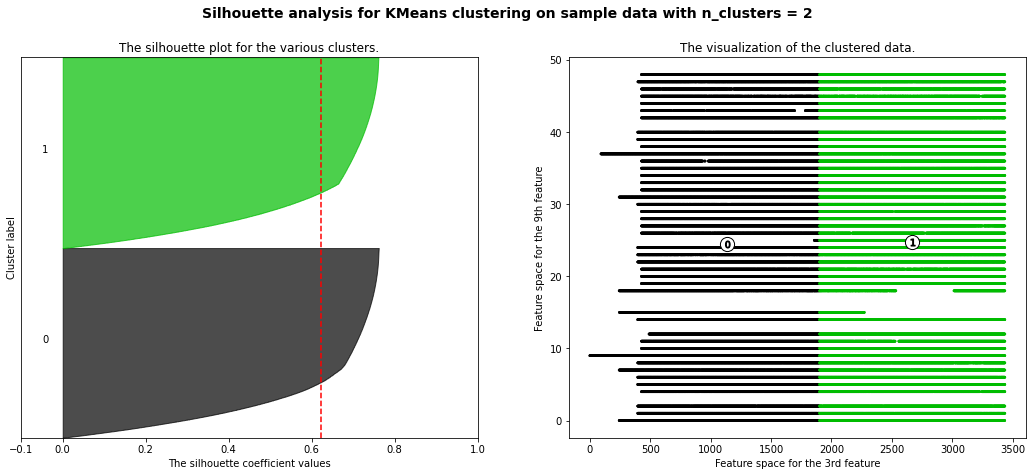

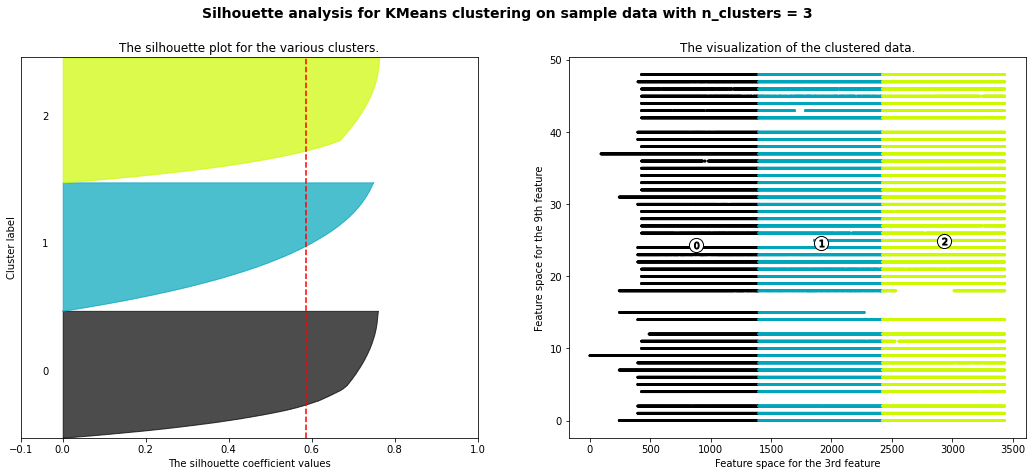

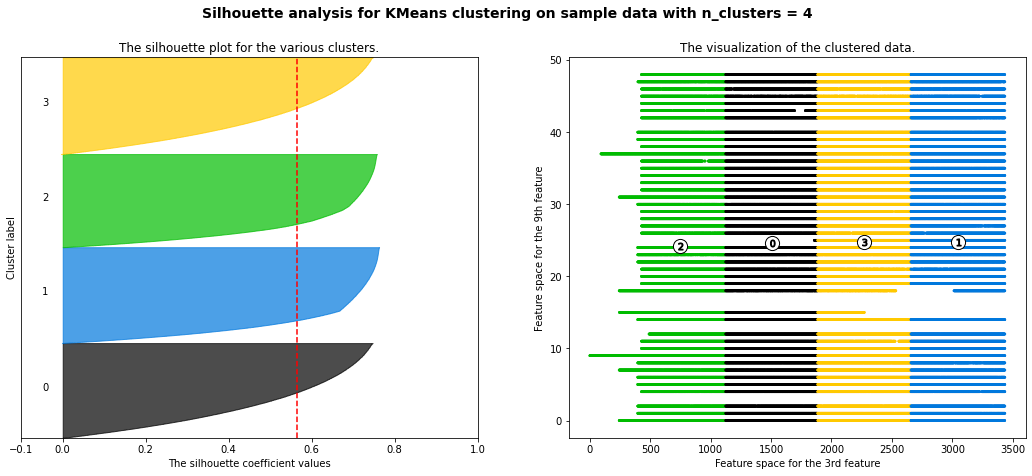

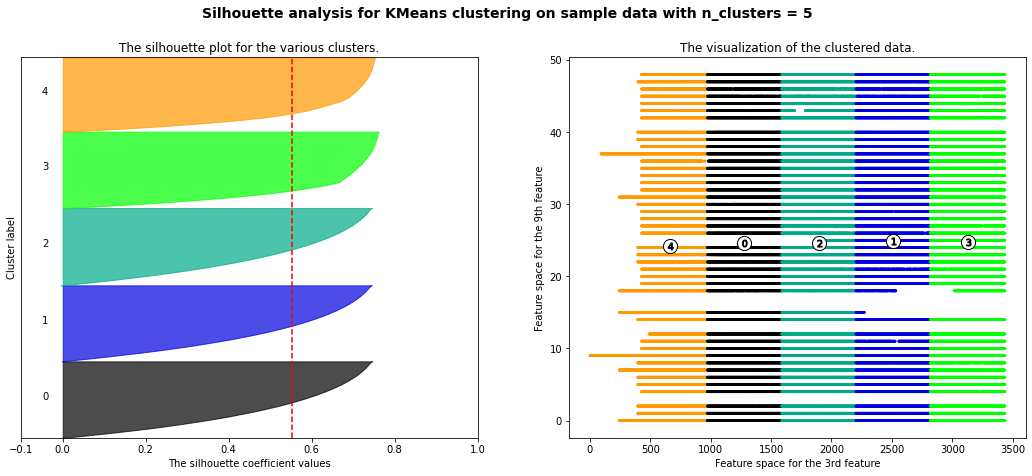

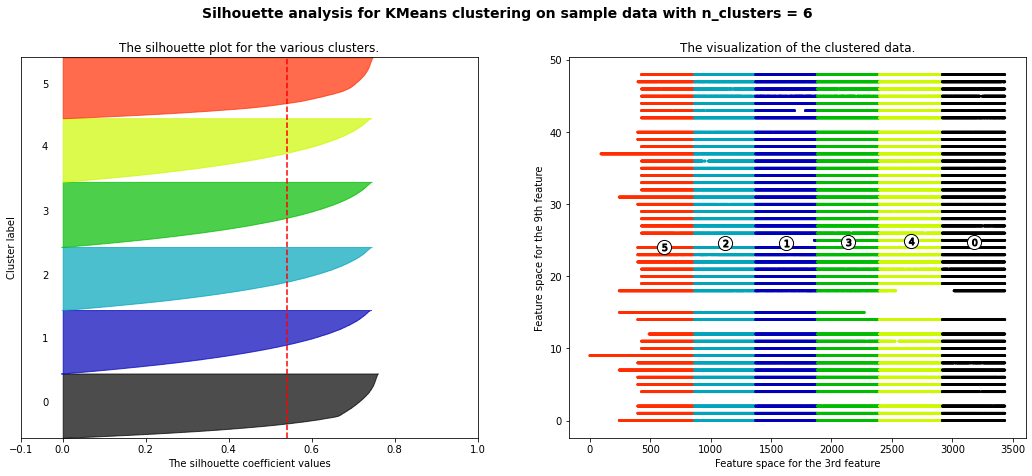

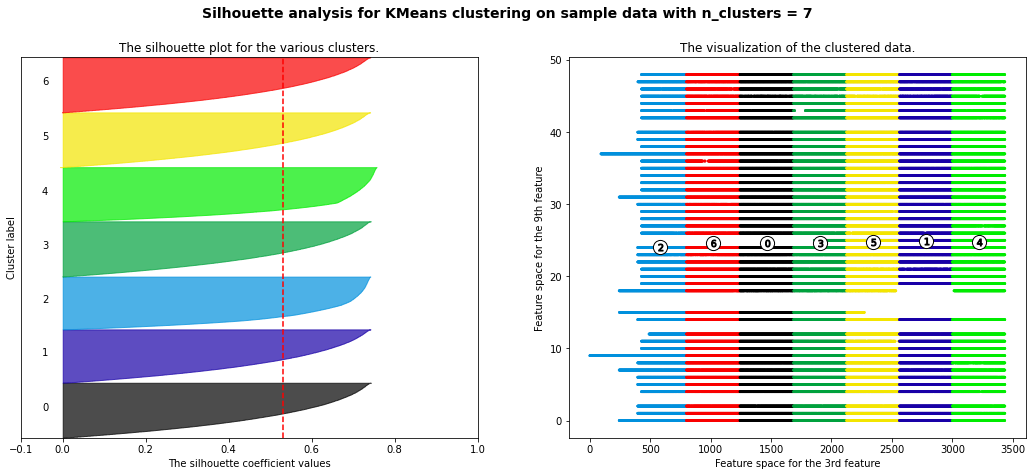

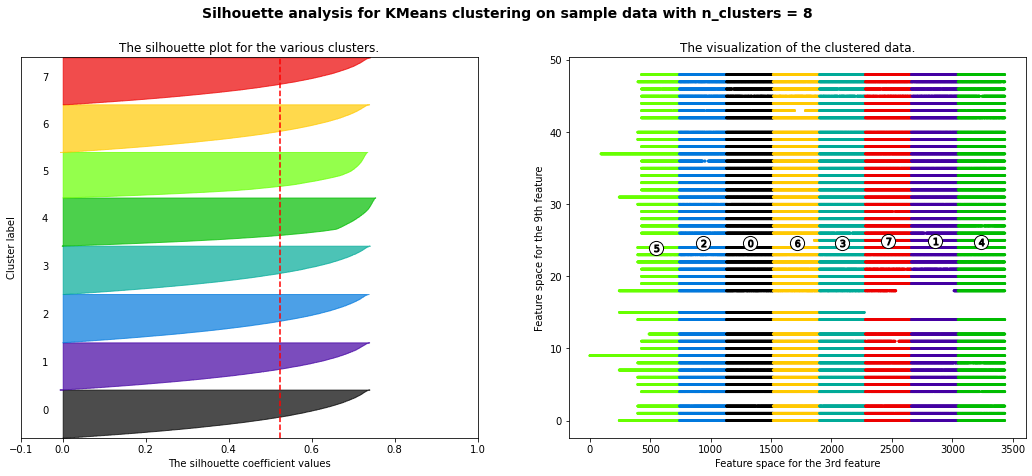

In [0]:
#ref:https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette
#ref:https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg_list = []
n_clusters_list = []
for n_clusters in range(2,9):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(xtr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=49)
    cluster_labels = clusterer.fit_predict(xtr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(xtr, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_avg_list += [silhouette_avg]
    n_clusters_list += [n_clusters]
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(xtr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(xtr[:, 0], xtr[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 3rd feature")
    ax2.set_ylabel("Feature space for the 9th feature")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

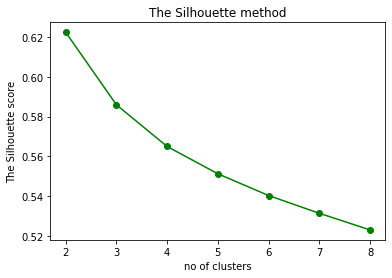

In [0]:
plt.plot(n_clusters_list, silhouette_avg_list, 'g-o')
plt.title('The Silhouette method')
plt.xlabel('no of clusters')
plt.ylabel('The Silhouette score')
plt.show()

# K-mean method and save the information

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=49).fit(xtr)
kmLabels = kmeans.labels_
Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
centroids = kmeans.cluster_centers_
print('Label:', Label)
print('Centroids',centroids)

Label: [63821, 64153]
Centroids [[1.13643424e+03 2.44397695e+01 4.81968785e-01 5.20348191e-01
  6.67691842e-03 8.34519205e+00 2.64968855e-01 8.33753504e+00
  1.42244805e+01 2.16393547e-01 6.93844915e-01 5.22917603e-01
  5.03242385e-01 5.11650371e-01 2.28269890e-01]
 [2.66466474e+03 2.48044797e+01 4.80598847e-01 5.23480434e-01
  5.90248953e-03 8.49225562e+00 2.60977401e-01 8.48141505e+00
  1.42327994e+01 2.13540017e-01 6.99577063e-01 5.22417939e-01
  5.02998471e-01 5.13985668e-01 2.20461387e-01]]


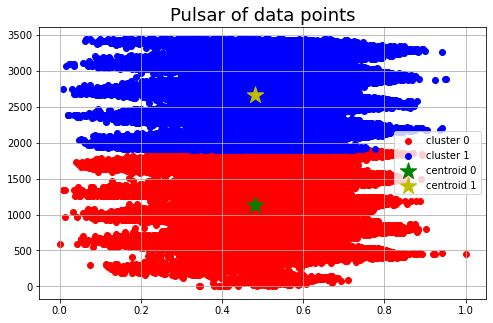

In [0]:
plt.figure(figsize=(8,5))
plt.title("Pulsar of data points", fontsize=18)
plt.grid(True)
plt.scatter(xtr[kmeans.labels_ == 0, 2], xtr[kmeans.labels_ == 0, 0],
            c='red', label='cluster 0')
plt.scatter(xtr[kmeans.labels_ == 1, 2], xtr[kmeans.labels_ == 1, 0],
            c='blue', label='cluster 1')
plt.scatter(centroids[0, 2], centroids[0, 0], marker='*', s=300, c='g', label='centroid 0')
plt.scatter(centroids[1, 2], centroids[1, 0], marker='*', s=300, c='y', label='centroid 1')
plt.legend()
plt.savefig('p_weather Kmean_10th fold.png', dpi=300)
plt.show()

0 of KFold 10
ROC AUC score: 0.5256091438798323
Confusion matrix
 [[5209 5823]
 [1342 1846]]
1 of KFold 10
ROC AUC score: 0.4748295821076681
Confusion matrix
 [[5542 5490]
 [1762 1426]]
2 of KFold 10
ROC AUC score: 0.4850008598233223
Confusion matrix
 [[5628 5404]
 [1722 1466]]
3 of KFold 10
ROC AUC score: 0.48589245354757693
Confusion matrix
 [[5158 5874]
 [1580 1607]]
4 of KFold 10
ROC AUC score: 0.5226108922828943
Confusion matrix
 [[5712 5320]
 [1506 1681]]
5 of KFold 10
ROC AUC score: 0.5487795949962604
Confusion matrix
 [[6054 4978]
 [1438 1749]]
6 of KFold 10
ROC AUC score: 0.49508123109653224
Confusion matrix
 [[5362 5669]
 [1581 1607]]
7 of KFold 10
ROC AUC score: 0.47624539807798416
Confusion matrix
 [[5289 5742]
 [1680 1508]]
8 of KFold 10
ROC AUC score: 0.5433634219156758
Confusion matrix
 [[5967 5064]
 [1448 1740]]
9 of KFold 10


IndexError: ignored

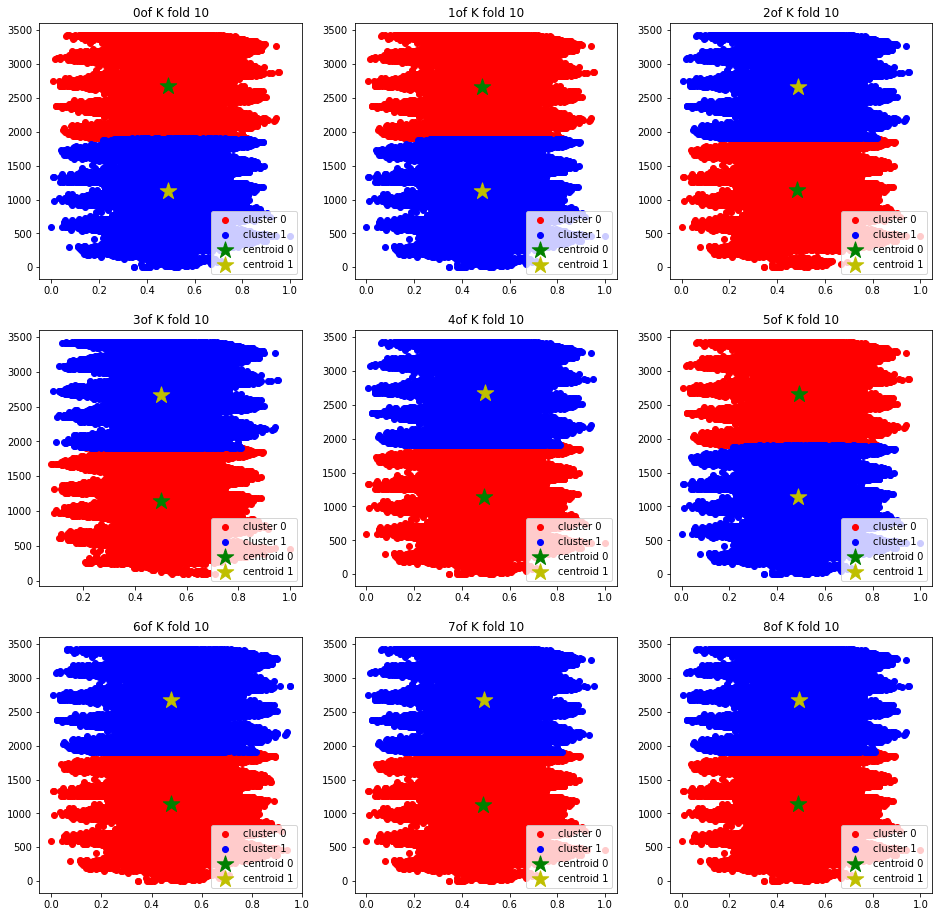

In [0]:
#ref:https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

pred_test_full =0
Label_all = []
centroids_all = []
cv_scoreRF_new =[]
ConfusionMatrix_all = []

i=0

fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []

## Use different 9 bins in training dataset,
## and remain one to be the testing dataset
for train_index,test_index in skf.split(p_weather_X, p_weather_Y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    xtr,xvl = p_weather_X[train_index],p_weather_X[test_index]
    ytr,yvl = p_weather_Y[train_index],p_weather_Y[test_index]

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=49)
    kmeans.fit(xtr)
    kmLabels = kmeans.labels_
    centers.append(kmLabels)
    ## save the centroid and the number of samples in each cluster in each 9 bins
    Label = [np.count_nonzero(kmLabels==0),np.count_nonzero(kmLabels==1)]
    Label_all += [Label]
    centroids = kmeans.cluster_centers_
    centroids_all += [centroids]

    ## plot the distribution of samples and the centroids
    #plt.figure(figsize=(8,5))
    #plt.title("Titanic of data points" "(%d of KFold 10)" %i, fontsize=18)
    #plt.grid(True)
    ax[i].scatter(xtr[kmeans.labels_ == 0, 2], xtr[kmeans.labels_ == 0, 0],
                c='red', label='cluster 0')
    ax[i].scatter(xtr[kmeans.labels_ == 1, 2], xtr[kmeans.labels_ == 1, 0],
                c='blue', label='cluster 1')
    ax[i].scatter(centroids[0, 2], centroids[0, 0], marker='*', s=300, c='g', label='centroid 0')
    ax[i].scatter(centroids[1, 2], centroids[1, 0], marker='*', s=300, c='y', label='centroid 1')
    ax[i].legend()
    ax[i].legend(loc='lower right')
    ax[i].set_title( str(i) +'of K fold 10')
    #ax[i].set_aspect('equal')
    #plt.savefig('Pulsar Kmean_' + str(i) + 'of K fold 10.png', dpi=300)
    #plt.show()

    ## train and test the dataset in random forest model
    modelRFnew = RandomForestClassifier(random_state=42)
    modelRFnew.fit(xtr,kmLabels)
    scoreRF_new = roc_auc_score(yvl,modelRFnew.predict(xvl))
    print('ROC AUC score:',scoreRF_new)
    cv_scoreRF_new.append(scoreRF_new)
    from sklearn.metrics import confusion_matrix
    ConfusionMatrix = confusion_matrix(yvl, modelRFnew.predict(xvl))
    print('Confusion matrix\n',ConfusionMatrix)
    ConfusionMatrix_all += [ConfusionMatrix]
    i+=1
plt.tight_layout();   

In [1]:
#ref:https://medium.com/@kelfun5354/model-tuning-and-what-is-it-using-python-630e388e224a
from sklearn.model_selection import cross_val_score
Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
scores = cross_val_score(model_DT, p_weather_X, p_weather_Y, cv=Skf)
scores
print("Mean : %.3f%%, Standard Deviation: (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))

NameError: ignored